In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [ ]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

youtube_df = pd.read_sql_query('select * from studentsperformance',con=engine)

In [14]:
ed_perform = pd.read_csv("StudentsPerformance.csv")

print(ed_perform)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B                 high school      stan

In [13]:
#check if there is missing value 
ed_perform.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
#vairable types?
ed_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?**

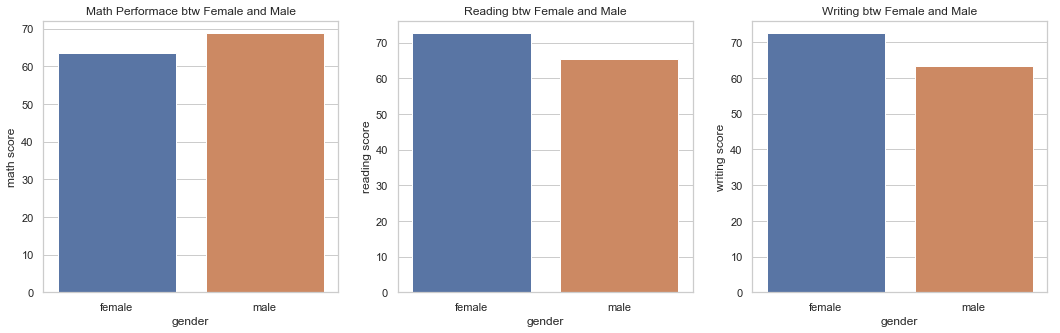

In [78]:
# gender vs. exam performances

gend_grouped = ed_perform.groupby("gender").mean()


plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

sns.barplot(gend_grouped.index, gend_grouped["math score"])
plt.title("Math Performace btw Female and Male")

plt.subplot(1,3,2)

sns.barplot(gend_grouped.index, gend_grouped["reading score"])
plt.title("Reading btw Female and Male")

plt.subplot(1,3,3)

sns.barplot(gend_grouped.index, gend_grouped["writing score"])
plt.title("Writing btw Female and Male")

plt.show()

plt.show()

In [106]:
stats.ttest_ind(ed_perform[ed_perform['gender'] == "female"][["math score", "reading score", "writing score"]], ed_perform[ed_perform['gender'] == "male"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


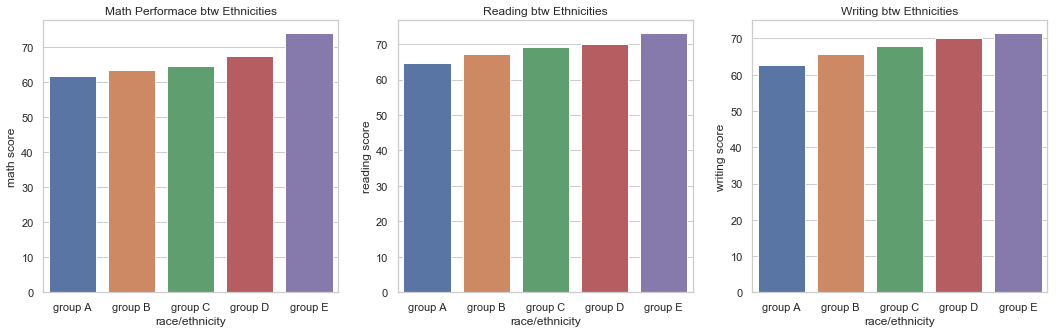

In [80]:
eth_grouped = ed_perform.groupby("race/ethnicity").mean()

print(eth_grouped)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

sns.barplot(eth_grouped.index, eth_grouped["math score"])
plt.title("Math Performace btw Ethnicities")

plt.subplot(1,3,2)

sns.barplot(eth_grouped.index, eth_grouped["reading score"])
plt.title("Reading btw Ethnicities")

plt.subplot(1,3,3)

sns.barplot(eth_grouped.index, eth_grouped["writing score"])
plt.title("Writing btw Ethnicities")

plt.show()

plt.show()

In [109]:
ethn = ed_perform["race/ethnicity"].unique()
eth_grouped = ed_perform.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethn)):
        for j in range(i+1, len(ethn)):
            print("t-test between groups {0} and {1}:".format(ethn[i], ethn[j]))
            print(stats.ttest_ind(
                ed_perform[ed_perform["race/ethnicity"]==ethn[i]][var], 
                ed_perform[ed_perform["race/ethnicity"]==ethn[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


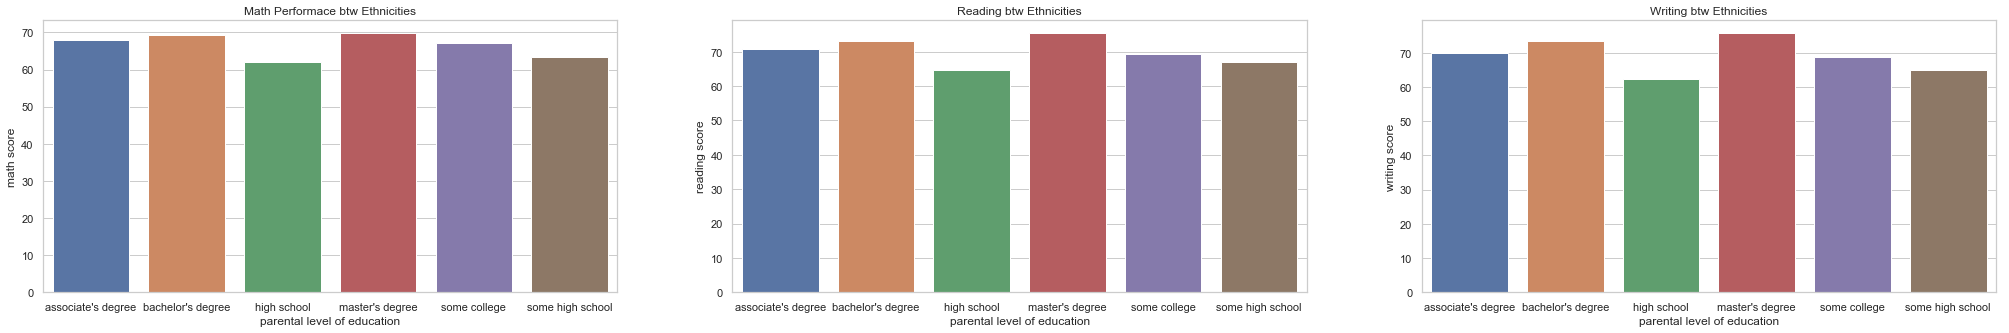

In [85]:
par_grouped = ed_perform.groupby("parental level of education").mean()

print(eth_grouped)

plt.figure(figsize=(35,5))

plt.subplot(1,3,1)

sns.barplot(par_grouped.index, par_grouped["math score"])
plt.title("Math Performace btw Ethnicities")

plt.subplot(1,3,2)

sns.barplot(par_grouped.index, par_grouped["reading score"])
plt.title("Reading btw Ethnicities")

plt.subplot(1,3,3)

sns.barplot(par_grouped.index, par_grouped["writing score"])
plt.title("Writing btw Ethnicities")

plt.show()

plt.show()

In [110]:
parent = ed_perform["parental level of education"].unique()
par_grouped = ed_perform.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for f in range(0, len(parent)):
        for m in range(f+1, len(parent)):
            print("t-test between groups {0} and {1}:".format(parent[f], parent[m]))
            print(stats.ttest_ind(
                ed_perform[ed_perform["parental level of education"]==parent[i]][var], 
                ed_perform[ed_perform["parental level of education"]==parent[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=0.0, pvalue=1.0)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=0.0, pvalue=1.0)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.0, pvalue=1.0)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=0.0, pvalue=1.0)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=0.0, pvalue=1.0)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=0.0, pvalue=1.0)
t-test between groups some college and associate's degree:
Ttest_indResult(statistic=0.0, pvalue=1.0)
t-test between groups some college and high school:
Ttest_indResult(statistic=0.0, pvalue=1.0)
t-test between groups some college and some high sch

**Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?**

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


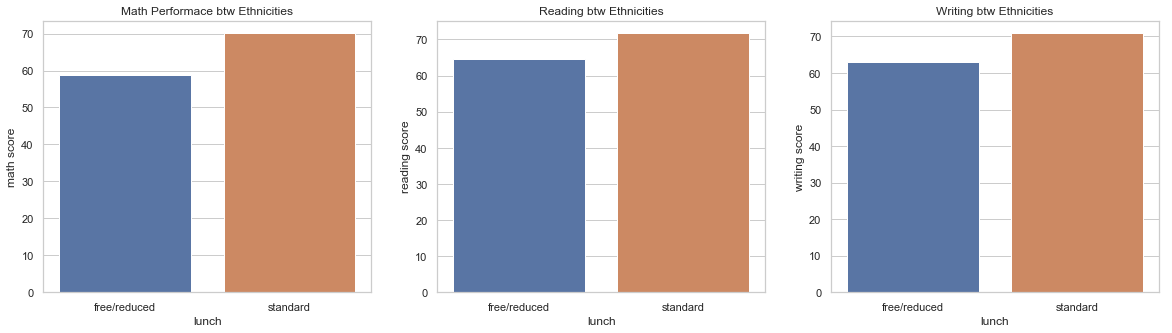

In [90]:
lun_grouped = ed_perform.groupby("lunch").mean()

print(lun_grouped)

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)

sns.barplot(lun_grouped.index, lun_grouped["math score"])
plt.title("Math Performace btw Ethnicities")

plt.subplot(1,3,2)

sns.barplot(lun_grouped.index, lun_grouped["reading score"])
plt.title("Reading btw Ethnicities")

plt.subplot(1,3,3)

sns.barplot(lun_grouped.index, lun_grouped["writing score"])
plt.title("Writing btw Ethnicities")

plt.show()



In [111]:
Lunch = ed_perform["lunch"].unique()
lun_grouped = ed_perform.groupby("lunch").mean()

print(lun_grouped)
stats.ttest_ind(ed_perform[ed_perform["lunch"] == "free/reduced"][["math score", "reading score","writing score"]], ed_perform[ed_perform["lunch"] == "standard"][["math score", "reading score","writing score"]])

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

**Does the test preparation course seem to have an effect on the exam performances?**

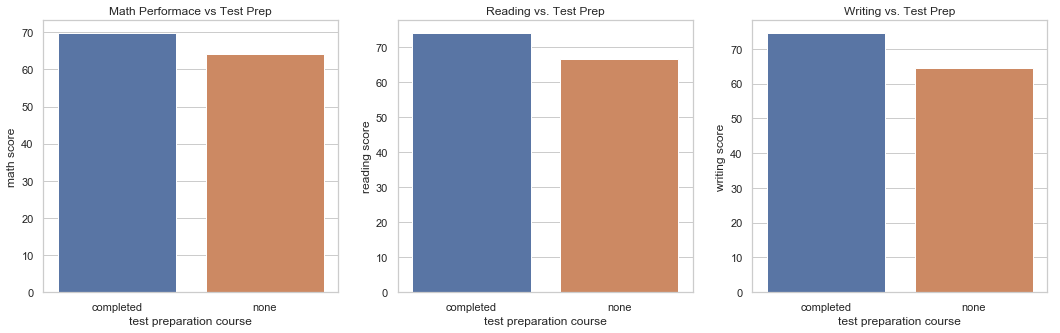

In [113]:
testprep_grouped = ed_perform.groupby("test preparation course").mean()


plt.figure(figsize=(18,5))

plt.subplot(1,3,1)

sns.barplot(testprep_grouped.index, testprep_grouped["math score"])
plt.title("Math Performace vs Test Prep")

plt.subplot(1,3,2)

sns.barplot(testprep_grouped.index, testprep_grouped["reading score"])
plt.title("Reading vs. Test Prep")

plt.subplot(1,3,3)

sns.barplot(testprep_grouped.index, testprep_grouped["writing score"])
plt.title("Writing vs. Test Prep")

plt.show()

In [115]:
stats.ttest_ind(ed_perform[ed_perform["test preparation course"] == "completed"][["math score", "reading score","writing score"]],ed_perform[ed_perform["test preparation course"] == "none"][["math score", "reading score","writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

**Which 2 exam scores are most correlated with each other?**

In [116]:
ed_perform.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


reading and writing scores are the most correlated with each other 